#  Using Python to Identify Protein Targets of a Compound of Interest 
Billy Lu
              
December 18, 2017

### Project Introduction

   In this project, I will be performing an analysis on the results obtained from a pull down assay performed by another member of my lab. The pull down assay was used to to find proteins that bind to a compound of interest. In this particular experiment, the compound of interest was conjugated to the agarose gel bead shown in the image below. This compound was exposed to a cell lysate, and proteins from the lysate that interacted with the compound bound to it. In order to rule out the possibility of the protein interacting with the bead itself, the experiment was also performed in a negative control condition where the beads are not conjugated to anything.The unbound proteins were then washed away. The attached proteins were eluted and identified using mass spectrometry. This experiment was performed in two sets: the first set of experiments had a higher concentration of cell lysate while the second set of experiment had a lower concentration of cell lysate. 

![Image of Pull_Down_Assay](https://www.thermofisher.com/content/dam/LifeTech/global/life-sciences/protein-biology/PBLC/Pull-down-shematic-734px.jpg)

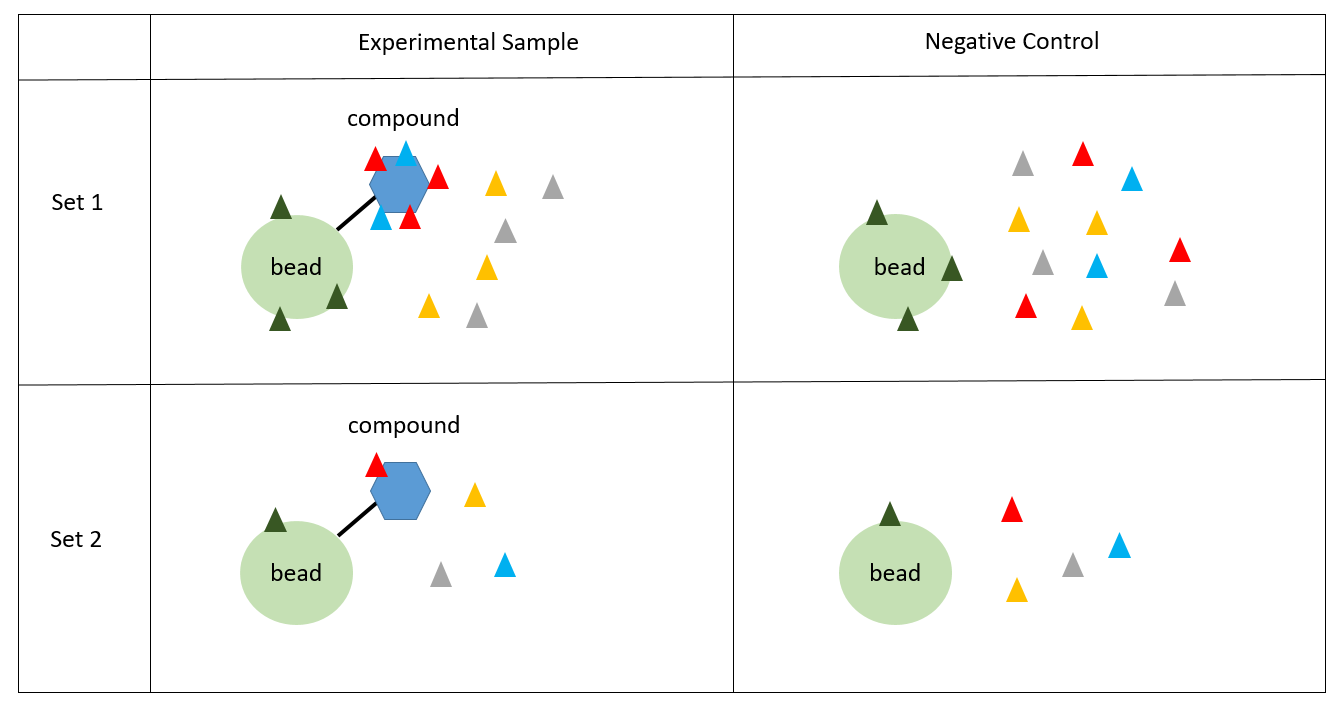

In [1]:
from IPython.core.display import Image 
Image(filename='C:/Users/Billy/Desktop/presentation pic.png')

I used the peptide spectrum match (PSM) from the mass spectrometry analysis as one indicator of how well the proteins bind to the compound.  For each protein identified from mass spec, I will find the ratio of the PSM from the experimental sample (beads attached to compounds) to that of the negative control sample (beads itself). The higher the ratio, the more likely and more certain the protein attached to the compound. The proteins of interest will have a ratio of or above the lower threshold of 1.5. My program below will find the proteins of interest that overlap the two sets of experiments. These overlapped proteins will then be studied further in the future.

### Importing the Excel Sheet to a dataframe on pandas

In [5]:
#importing packages necessary for this program
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#I imported the venn diagram package from matplotlib. I initially installed it using the command pip install matplotlib-venn, which didn't work. I managed to use the venn diagram package using the conda installation (conda install -c conda-forge matplotlib-venn). 
from matplotlib_venn import venn2

In [6]:
# import the Excel sheet of data into a dataframe, which can be found on Github in the final projects folder
df1 = pd.read_excel("C:/Users/billy/Desktop/Appendix1_data_summary_billy v3.xlsx")

As one can see from the dataframe below, there were a lot of data generated by mass spec analysis. The values in the accession column are the codes representing a unique protein. The other columns that are needed to find the proteins of interest are:
- PSM A3: PSM of the experimental sample from the first set of experiments 
- PSM D3: PSM of the negative control from the first set of experiments 
- PSM E3: PSM of the experimental sample from the second set of experiments 
- PSM H3: PSM of the negative control from the second set of experiments 

In [13]:
df1

,Accession (Protein),ΣCoverage,Σ# Proteins,Σ# Unique Peptides,Σ# Peptides,Σ# PSMs,# PSM A3 (Set 1),# PSM B3 (Set 1),# PSM C3 (Set 1),# PSM D3 (Set 1),# PSM E3 (Set 2),# PSM F3 (Set 2),# PSM G3 (Set 2),# PSM H3 (Set 2),# AAs,MW [kDa],calc. pI
0,XP_001350282.1,86.23,1,57,57,1306,210.0,228.0,207.0,223.0,135.0,123.0,81.0,99.0,443,48.927882,9.056152
1,XP_001348998.1,64.30,1,71,71,1099,150.0,200.0,122.0,169.0,149.0,129.0,85.0,95.0,745,86.112437,5.008301
2,NP_003117.2,64.16,1,151,151,886,166.0,167.0,155.0,154.0,70.0,77.0,39.0,58.0,2419,279.841909,5.046387
3,XP_001349336.1,57.16,1,51,51,702,89.0,111.0,85.0,80.0,105.0,102.0,60.0,70.0,677,73.868471,5.668457
4,XP_001352026.1,65.51,1,77,77,636,107.0,183.0,102.0,110.0,42.0,43.0,18.0,31.0,1418,159.351068,6.756348
5,NP_000333.1,43.58,1,34,34,466,84.0,100.0,81.0,88.0,34.0,31.0,27.0,21.0,911,101.727417,5.186035
6,XP_001348829.1,56.53,1,25,25,422,49.0,64.0,51.0,61.0,53.0,54.0,44.0,46.0,398,45.281411,5.693848
7,XP_001351300.1,62.98,1,29,29,396,56.0,65.0,53.0,62.0,41.0,31.0,64.0,24.0,262,30.028316,9.773926
8,XP_001348660.1,64.78,1,47,47,391,55.0,78.0,48.0,64.0,50.0,47.0,16.0,33.0,832,93.462392,6.800293
9,XP_001348404.1,64.97,1,27,27,362,65.0,84.0,68.0,61.0,23.0,20.0,24.0,17.0,294,33.977150,9.773926


In [14]:
#slicing the columns that I need for the analysis
df2 = df1.iloc [:, [0, 6, 9, 10, 13]]

In [15]:
df2.head()

,Accession (Protein),# PSM A3 (Set 1),# PSM D3 (Set 1),# PSM E3 (Set 2),# PSM H3 (Set 2)
0,XP_001350282.1,210.0,223.0,135.0,99.0
1,XP_001348998.1,150.0,169.0,149.0,95.0
2,NP_003117.2,166.0,154.0,70.0,58.0
3,XP_001349336.1,89.0,80.0,105.0,70.0
4,XP_001352026.1,107.0,110.0,42.0,31.0


In [16]:
#renaming the columns for simplification
#PSM A3 = N1
#PSM D3 = P1
#PSM E3 = N2
#PSM H3 = P2
df3 = df2.rename(columns = {'Accession (Protein)': 'Protein','# PSM A3 (Set 1)':'N1', '# PSM D3 (Set 1)':'P1', '# PSM E3 (Set 2)':'N2', '# PSM H3 (Set 2)':'P2'})

In [17]:
df3.head()

,Protein,N1,P1,N2,P2
0,XP_001350282.1,210.0,223.0,135.0,99.0
1,XP_001348998.1,150.0,169.0,149.0,95.0
2,NP_003117.2,166.0,154.0,70.0,58.0
3,XP_001349336.1,89.0,80.0,105.0,70.0
4,XP_001352026.1,107.0,110.0,42.0,31.0


In [18]:
#finding the ratio the PSM from the experimental sample to that of the negative control sample from the first set of experiments
df3 ['P1/N1'] = df3 ['P1'] / df3['N1']

#finding the ratio the PSM from the experimental sample to that of the negative control sample from the second set of experiments
df3 ['P2/N2'] = df3 ['P2'] / df3['N2']

In [19]:
df3.head()

,Protein,N1,P1,N2,P2,P1/N1,P2/N2
0,XP_001350282.1,210.0,223.0,135.0,99.0,1.061905,0.733333
1,XP_001348998.1,150.0,169.0,149.0,95.0,1.126667,0.637584
2,NP_003117.2,166.0,154.0,70.0,58.0,0.927711,0.828571
3,XP_001349336.1,89.0,80.0,105.0,70.0,0.898876,0.666667
4,XP_001352026.1,107.0,110.0,42.0,31.0,1.028037,0.738095


### Removing Nan Values from Set 1 and Set 2

In [20]:
#create different dataframes for set 1 and set 2 to use for venn diagram
df1Set1 = df3.iloc [:, [0, 1, 2, 5]]
df1Set2 = df3.iloc [:, [0, 3, 4, 6]]

In [21]:
#remove rows with NaN values in the B1 and P1 columns in Set 1
df2Set1 = df1Set1[np.isfinite(df1Set1['P1/N1'])]
print ("Number of Identified proteins in Set 1:", df2Set1.shape[0])

#removes rows with NaN values in the B2 and P2 columns in Set 2
df2Set2 = df1Set2[np.isfinite(df1Set2['P2/N2'])]
print ("Number of Identified proteins in Set 2:", df2Set2.shape [0])

Number of Identified proteins in Set 1: 469
Number of Identified proteins in Set 2: 278


In [29]:
#removing the rows with NaN values in both ratio columns in the original datatable. This will show detected proteins that are overlapped between the 2 sets
df4 = df3[np.isfinite(df3['P2/N2'])]
df5 = df4[np.isfinite(df4['P1/N1'])]

In [23]:
df5

,Protein,N1,P1,N2,P2,P1/N1,P2/N2
0,XP_001350282.1,210.0,223.0,135.0,99.0,1.061905,0.733333
1,XP_001348998.1,150.0,169.0,149.0,95.0,1.126667,0.637584
2,NP_003117.2,166.0,154.0,70.0,58.0,0.927711,0.828571
3,XP_001349336.1,89.0,80.0,105.0,70.0,0.898876,0.666667
4,XP_001352026.1,107.0,110.0,42.0,31.0,1.028037,0.738095
5,NP_000333.1,84.0,88.0,34.0,21.0,1.047619,0.617647
6,XP_001348829.1,49.0,61.0,53.0,46.0,1.244898,0.867925
7,XP_001351300.1,56.0,62.0,41.0,24.0,1.107143,0.585366
8,XP_001348660.1,55.0,64.0,50.0,33.0,1.163636,0.660000
9,XP_001348404.1,65.0,61.0,23.0,17.0,0.938462,0.739130


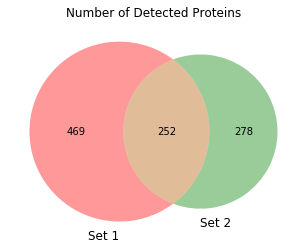

In [24]:
#creating a venn diagram that shows the number of identified proteins between Set 1 and Set 2 and those that are shared 
v=venn2(subsets = (df2Set1.shape [0], df2Set2.shape[0], df5.shape[0],), set_labels = ('Set 1', 'Set 2'))
plt.title("Number of Detected Proteins")
plt.show()

### Finding the Overlapping Proteins of Interest between Set 1 and Set 2

In [25]:
#Filtered out rows where the P1/B1 ratio is below the threshold of 1.5
df3Set1 = df2Set1 [df2Set1 ['P1/N1'] >= 1.5]
print ("Number of Proteins of Interest in Set 1:", df3Set1.shape [0])

#Filtered out rows where the P2/B2 ratio is below the threshold of 1.5
df3Set2 = df2Set2 [df2Set2 ['P2/N2'] >= 1.5]
print ("Number of Proteins of Interest in Set 2:", df3Set2.shape [0])

Number of Proteins of Interest in Set 1: 111
Number of Proteins of Interest in Set 2: 31


In [26]:
#filter out rows in both ratio columns where the values are below 1.5
#this will identify proteins that have PSM ratios with or above 1.5 that are shared between the 2 sets of experiments
df6 = df5 [df5['P1/N1'] >= 1.5]
df7 = df6 [df6['P2/N2'] >= 1.5]

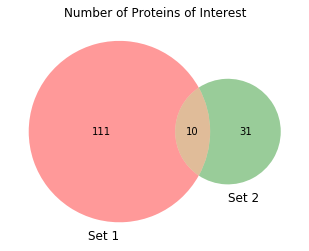

In [27]:
#creating a venn diagram that shows the number of proteins of interest in Set 1 and Set 2 and those that are shared between the 2 sets
v=venn2(subsets = (df3Set1.shape [0], df3Set2.shape[0], df7.shape[0],), set_labels = ('Set 1', 'Set 2'))
plt.title("Number of Proteins of Interest")
plt.show()

This table below identifies the proteins with a PSM ratio with or above 1.5 that are shared between the 2 sets of experiments. These proteins will be studied further in the future as potential targets of our compound of interest.

In [17]:
print (df7)

            Protein    N1    P1   N2   P2     P1/N1     P2/N2
96   XP_001347943.1  12.0  21.0  3.0  7.0  1.750000  2.333333
152  XP_001350471.1   8.0  13.0  1.0  2.0  1.625000  2.000000
154  XP_001349292.1   7.0  11.0  3.0  5.0  1.571429  1.666667
162  XP_001348428.1   6.0  12.0  1.0  4.0  2.000000  4.000000
188  XP_001347737.1   5.0   9.0  1.0  2.0  1.800000  2.000000
213  XP_001347487.1   5.0   9.0  1.0  3.0  1.800000  3.000000
264     XP_966093.1   1.0   7.0  1.0  3.0  7.000000  3.000000
303  XP_001351871.1   1.0   2.0  2.0  3.0  2.000000  1.500000
335     XP_966009.1   1.0   2.0  1.0  2.0  2.000000  2.000000
352  XP_001350655.1   2.0   3.0  1.0  2.0  1.500000  2.000000
